### 采用 scikit-learn 中的 RandomForestRegressor 对加利福尼亚房价数据集进行预测。

#### 建立模型

In [5]:
from sklearn.datasets import fetch_california_housing
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
import numpy as np
# X_california, y_california = fetch_california_housing(return_X_y=True)

# 导入数据集
data = fetch_california_housing()
X_california = data.data
y_california = data.target
feature_names = data.feature_names
target_name = "House Price"

# 输出数据集信息
print("数据集大小:", X_california.shape)
print("特征数量:", len(feature_names))
print("特征名称:", feature_names)
print("标签名称:", target_name)
print("标签分布情况:\n", data.target)
# 后续采用的是交叉验证，所以不需要划分训练集和测试集

数据集大小: (20640, 8)
特征数量: 8
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
标签名称: House Price
标签分布情况:
 [4.526 3.585 3.521 ... 0.923 0.847 0.894]


#### 建立模型

In [6]:
# 分别使用 DecisionTreeRegressor 和 RandomForestRegressor 建立分类模型（参数默认）
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

# 建立DecisionTreeRegressor模型
decision_tree_reg = DecisionTreeRegressor()
# 以根均方误差 RMSE 为评估指标： ‘neg_root_mean_squared_error’
dt_scores = cross_validate(decision_tree_reg, X_california, y_california,
                            cv=10, scoring='neg_root_mean_squared_error', return_train_score=True,n_jobs=-1)

dt_train_rmse = np.sqrt(-dt_scores['train_score'])
dt_test_rmse = np.sqrt(-dt_scores['test_score'])
print("DecisionTreeRegressor模型的训练集RMSE：", dt_train_rmse)
print("DecisionTreeRegressor模型的测试集RMSE：", dt_test_rmse)
print("DecisionTreeRegressor模型的拟合分别耗时：", dt_scores['fit_time'])

# 建立RandomForestRegressor模型
random_forest_reg = RandomForestRegressor()
# 以根均方误差 RMSE 为评估指标
rf_scores = cross_validate(random_forest_reg, X_california, y_california,
                            cv=10, scoring='neg_root_mean_squared_error', return_train_score=True,n_jobs=-1)

rf_train_rmse = np.sqrt(-rf_scores['train_score'])
rf_test_rmse = np.sqrt(-rf_scores['test_score'])
print("RandomForestRegressor模型的训练集RMSE：", rf_train_rmse)
print("RandomForestRegressor模型的测试集RMSE：", rf_test_rmse)
print("RandomForestRegressor模型的拟合分别耗时：", rf_scores['fit_time'])

DecisionTreeRegressor模型的训练集RMSE： [1.80993662e-08 1.75167480e-08 1.66068000e-08 1.76880432e-08
 1.73949925e-08 1.68361327e-08 1.70457515e-08 1.78470577e-08
 1.57117992e-08 1.80616459e-08]
DecisionTreeRegressor模型的测试集RMSE： [1.05353454 0.94585612 0.93613294 0.85116418 0.94385873 0.95461026
 0.85923267 1.0131711  1.00974732 0.8490412 ]
DecisionTreeRegressor模型的拟合分别耗时： [0.29175854 0.27856874 0.27131915 0.26383686 0.27922058 0.2799058
 0.26783299 0.26800036 0.27350926 0.27793074]
RandomForestRegressor模型的训练集RMSE： [0.42947702 0.4318     0.42694567 0.43545373 0.42631316 0.42773343
 0.43574291 0.42558595 0.41850029 0.43149814]
RandomForestRegressor模型的测试集RMSE： [0.91583635 0.77231773 0.80501849 0.69325808 0.79534031 0.7663627
 0.72131068 0.86402846 0.89461131 0.70120765]
RandomForestRegressor模型的拟合分别耗时： [18.24408627 18.39546514 18.37744331 18.19470143 18.36799383 18.01832581
 18.31475139 18.23786569 18.17983556 18.30214238]


#### 讨论一

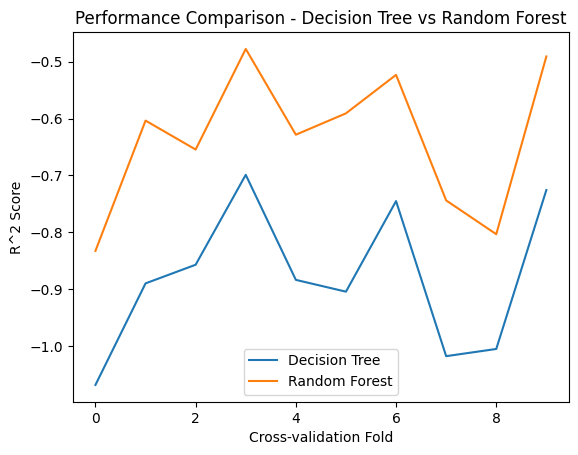

In [3]:
import matplotlib.pyplot as plt

# 提取决策树和随机森林的评分
dt_test_scores = dt_scores['test_score']
rf_test_scores = rf_scores['test_score']

# 绘制折线图
plt.plot( dt_test_scores, label='Decision Tree')
plt.plot( rf_test_scores, label='Random Forest')

# 添加图例、标签和标题
plt.legend()
plt.xlabel('Cross-validation Fold')
plt.ylabel('R^2 Score')
plt.title('Performance Comparison - Decision Tree vs Random Forest')

# 显示图形
plt.show()
# 如下图，可以看出随机森林的性能要优于决策树，且随着交叉验证的进行，随机森林的性能变化不大，而决策树的性能则有所波动
# 随机森林模型相对于单个决策树模型，在数据集上表现更好，其在训练集上具有更好的拟合能力，
# 并且在测试集上具有更低的预测误差，虽然牺牲了一些拟合时间。

#### 讨论二

Training Progress: 100%|██████████| 100/100 [12:12<00:00,  7.33s/it]


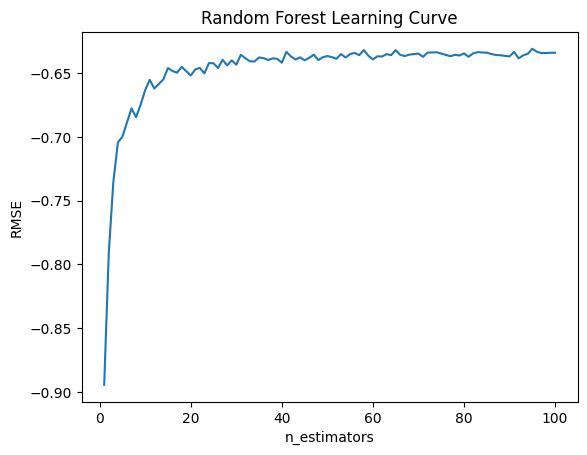

In [7]:
# n_estimators 随机森林中决策树的数量
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

# 定义 n_estimators 的取值范围
n_estimators_range = range(1, 101)
# 初始化空列表，用于存储不同 n_estimators 对应的交叉验证结果
mean_scores = []

# 循环尝试不同的 n_estimators 值
#for n_estimators in n_estimators_range:
for n_estimators in tqdm(n_estimators_range, desc="Training Progress"):
#增加训练进度条
    
    random_forest_reg = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)
    scores = cross_val_score(random_forest_reg, X_california, y_california, cv=10,
                         scoring='neg_root_mean_squared_error', n_jobs=-1)
    
    # 创建随机森林回归模型
    ##random_forest_reg = RandomForestRegressor(n_estimators=n_estimators)
    # 执行交叉验证并计算评估指标（这里使用负的均方根误差）
    ##scores = cross_val_score(random_forest_reg, X_california, y_california, cv=10,
    #                          scoring='neg_root_mean_squared_error')
    
    # 计算均值并将结果添加到列表中
    mean_scores.append(np.mean(scores))

# 绘制学习曲线
plt.plot(n_estimators_range, mean_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('Random Forest Learning Curve')
plt.show()


Training Progress: 100%|██████████| 100/100 [58:54<00:00, 35.35s/it]


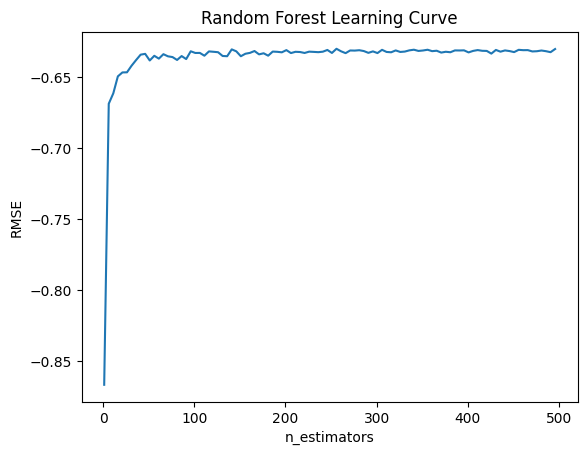

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

# 定义 n_estimators 的取值范围
n_estimators_range = range(1,500, 5)
# 初始化空列表，用于存储不同 n_estimators 对应的交叉验证结果
mean_scores = []

# 循环尝试不同的 n_estimators 值
#for n_estimators in n_estimators_range:
for n_estimators in tqdm(n_estimators_range, desc="Training Progress"):
    
    random_forest_reg = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)
    scores = cross_val_score(random_forest_reg, X_california, y_california, cv=10,
                         scoring='neg_root_mean_squared_error', n_jobs=-1)

    # 创建随机森林回归模型
    #random_forest_reg = RandomForestRegressor(n_estimators=n_estimators)
    # 执行交叉验证并计算评估指标（这里使用负的均方根误差）
    #scores = cross_val_score(random_forest_reg, X_california, y_california, cv=10, scoring='neg_root_mean_squared_error')
    
    # 计算均值并将结果添加到列表中
    mean_scores.append(np.mean(scores))

# 绘制学习曲线
plt.plot(n_estimators_range, mean_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('Random Forest Learning Curve')
plt.show()


In [9]:
# 上方代码格单次运算耗时1h(12i7分配单核CPU)，故运行一次后将结果保存为csv文件
import csv
# 将结果导出为 CSV 文件
output_file = 'mean_scores.csv'
with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['n_estimators', 'RMSE'])
    writer.writerows(zip(n_estimators_range, mean_scores))

In [12]:
from sklearn.model_selection import RandomizedSearchCV
# 定义 n_estimators 的范围
n_estimators_range = list(range(200, 400))

# 创建随机森林回归模型
random_forest_reg = RandomForestRegressor()

# 定义超参数空间
param_space = {
    'n_estimators': n_estimators_range,
    # 添加其他超参数及其取值范围
}

# 执行随机搜索
random_search = RandomizedSearchCV(random_forest_reg, param_space, n_iter=10, cv=10,
                                   scoring='neg_root_mean_squared_error', random_state=520,n_jobs=-1)

# 在数据集上进行拟合和超参数搜索
random_search.fit(X_california, y_california)

# 输出最佳的超参数和评分
best_params = random_search.best_params_
best_score = np.sqrt(-random_search.best_score_)

print("最佳超参数:", best_params)
print("最佳评分(RMSE):", -random_search.best_score_)

# RandomizedSearchCV 的计算效率通常比 GridSearchCV 高，尤其是当超参数空间较大时
# GridSearchCV 对所有可能的参数组合进行 exhaustive 搜索，
# 而 RandomizedSearchCV 则在给定的超参数空间中随机采样一组参数组合进行搜索
# 这对于一些超参数对模型性能有较大影响的情况下特别有用
# 然而，GridSearchCV 也有其优势，它遍历整个参数空间，不会错过任何可能的组合
# 当超参数空间相对较小且每个超参数都有明确的取值范围时，GridSearchCV 可以确保找到最优解。

最佳超参数: {'n_estimators': 278}
最佳评分(RMSE): 0.6299052195396495


#### 讨论三

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 定义超参数搜索范围
param_dist = {
    'n_estimators': randint(90, 200),  # 决策树的数量,randint会生成50-200之间的随机整数
    'max_depth': [None, 1, 5, 10],  # 每棵树的最大深度
}

# 建立RandomForestRegressor模型
random_forest_reg = RandomForestRegressor()

# 使用RandomizedSearchCV进行超参数搜索
random_search = RandomizedSearchCV(random_forest_reg, param_distributions=param_dist,
                                   scoring='neg_root_mean_squared_error', cv=10, n_iter=10,n_jobs=-1)
random_search.fit(X_california, y_california)

# 输出最佳超参数组合和对应的RMSE评分
print("最佳超参数组合：", random_search.best_params_)
print("最佳评分(RMSE):", -random_search.best_score_)
# print("最佳RMSE评分：", np.sqrt(-random_search.best_score_))


最佳超参数组合： {'max_depth': None, 'n_estimators': 138}
最佳评分(RMSE): 0.6313334321417242
